# Projet final : Fashion Mnist Classification

## Name

**1- Mohamadou 		  BOLY<br/>
2- Mamadou Abass      DIALLO<br/>
3- Mouhamadoul Amine  MBAYE<br/>
4- Aboubakary		  LY**<br/>

![](https://images.unsplash.com/photo-1512436991641-6745cdb1723f?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [Lauren Fleischmann](https://unsplash.com/photos/R2aodqJn3b8)

In this exercise, we will try to use a neural network on a simple classification task: classifying images of clothes into 10 classes.

# Chargement des donnees

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

/Users/macbook/anaconda3/envs/azerty/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/macbook/anaconda3/envs/azerty/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/macbook/anaconda3/envs/azerty/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/macbook/anaconda3/envs/azerty/lib

This dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

# Exploration des donnees

In [2]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


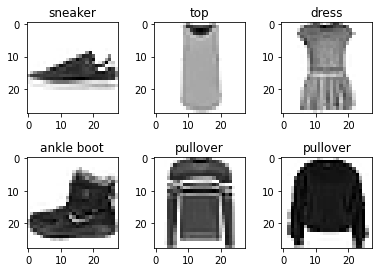

In [3]:
# Explore the data, display some input images
import matplotlib.pyplot as plt
import numpy as np

# All of values of label existing in the datasets, we have 10 categories
label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#We store all of index who desired to plot
label_show = list()

# we generate a random value between 0 and 60000
idx = np.random.randint(X_train.shape[0])
# Append the first random choice
label_show.append(y_train[idx])
# We iterate to choose another 6 values different of the first
while (len(label_show) != 6):
    idx = np.random.randint(X_train.shape[0])
    if (y_train[idx] not in label_show):
        label_show.append(y_train[idx])
    
# We plot them   
for label,myidx in zip(label_show, range(1,7)):
    plt.subplot(2,3,myidx)
    plt.imshow(X_train[label], cmap='gray_r')
    plt.title(label_class[y_train[label]])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

# Normalisation et encodage des labels

In [4]:
from tensorflow.keras.utils import to_categorical

# The function to_categorical transform all of values to matrix
# The form of the matrix is (numberofobservations, valueuniqueoflabel)
# We use to_categorical because the output of the neurone not to be a categorical value but a numeric value
# Therefore the function encode a label
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# We normalize the value for speed training and fast convergence
# Speed training beacause when to normalise the values, all of values are between 0 and 1
# For example when we have to variable age and salary, we remark all of value of age is between 0 and max 120
# But the salary is in interval min 300000 for example and maximum 8M
# Then the weight of salary and the weight a age is so different and the training is not fasting
X_train_norm = X_train/255.
X_test_norm = X_test/255.

# The image dimension of X_train and X_test is (28,28)
# To the next function we transform the two dimension to one dimension
# It's util because when the shape of all of images was different, we transform all of  dimension to a an unique
# dimension, and for our example, the input values to the model is 28*28=784
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], np.prod(X_train_norm.shape[1:]))
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], np.prod(X_test_norm.shape[1:]))


In [5]:
print(X_train_norm.shape, X_test_norm.shape)

(60000, 784) (10000, 784)


# Creation de la fonction qui cree le modele

In [6]:
# Build your model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def my_model(input_dim):
    # Create the Sequential object
    model = Sequential()
    # We have 784 input neurones and a hidden layer of 100 neurones
    model.add(Dense(100, input_shape=input_dim, activation='relu'))

    # Here the output of model is 10
    model.add(Dense(10, activation='softmax'))
    
    return model

# Creation, compilation et entrainement du model

In [7]:
# The input of the model is (784,0)
model = my_model((X_test_norm.shape[1],))

# We have a classification model of multiple classes , then we use a loss for classification
# In problem of classification we have categorical_crossentropy, sparse_categorical_crossentropy, kullback_leibler_divergence
# and so on
# And we compile the model using the adam optimizer and a loss, and calcule the accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Here the model train by using X_train and y_train, we notice that the ouput of model is equal of the number of
# class who predict, for every single observations, we predict a value.
# We use 5 epochs and 132 batchsize to avoid overfitting
# If we choice a high value of epochs and small value of batchsize, it's possible the model fit perfectly to the train
# but we have a small accuracy in testset
history = model.fit(X_train_norm, y_train_cat, epochs=5, batch_size=132, shuffle=True)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/5
60000/60000 [==============================] - 1s 12us/sample - loss: 0.5704 - acc: 0.8049
Epoch 2/5
60000/60000 [==============================] - 1s 10us/sample - loss: 0.4066 - acc: 0.8580
Epoch 3/5
60000/60000 [==============================] - 1s 9us/sample - loss: 0.3648 - acc: 0.8723
Epoch 4/5
60000/60000 [==============================] - 1s 10us/sample - loss: 0.3433 - acc: 0.8776
Epoch 5/5
60000/60000 [==============================] - 1s 10us/sample - loss: 0.3226 - acc: 0.8848


# Evaluation du modele

In [8]:
# Compute the accuracy of your model

print('accuracy on train with NN:', model.evaluate(X_train_norm, y_train_cat)[1])
# TODO : Evaluer le  model sur le jeu de test et expliquer la difference avec le jeu de train
print('accuracy on test with NN:', model.evaluate(X_test_norm, y_test_cat)[1])



60000/60000 [==============================] - 1s 13us/sample - loss: 0.3129 - acc: 0.8856
accuracy on train with NN: 0.88558334
10000/10000 [==============================] - 0s 14us/sample - loss: 0.3754 - acc: 0.8611
accuracy on test with NN: 0.8611


In [10]:
model = my_model((X_test_norm.shape[1],))
# Some optimizer adam, adamax, rmsprop, adadelta, adagrad, nadam etc
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_norm, y_train_cat, epochs=10, batch_size=132, shuffle=True)

Epoch 1/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.5733 - acc: 0.7995
Epoch 2/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.4177 - acc: 0.8495
Epoch 3/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.3746 - acc: 0.8663
Epoch 4/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.3455 - acc: 0.8754
Epoch 5/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.3262 - acc: 0.8818
Epoch 6/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.3091 - acc: 0.8881
Epoch 7/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.2967 - acc: 0.8915
Epoch 8/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.2846 - acc: 0.8963
Epoch 9/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.2757 - acc: 0.8985
Epoch 10/10
60000/60000 [==============================] - 1s 10us/sample - loss: 

In [11]:
print('accuracy on train with NN:', model.evaluate(X_train_norm, y_train_cat)[1])
print('accuracy on test with NN:', model.evaluate(X_test_norm, y_test_cat)[1])

60000/60000 [==============================] - 1s 14us/sample - loss: 0.2699 - acc: 0.8987
accuracy on train with NN: 0.8986833
10000/10000 [==============================] - 0s 14us/sample - loss: 0.3639 - acc: 0.8702
accuracy on test with NN: 0.8702


In [12]:
model = my_model((X_test_norm.shape[1],))
# Some optimizer adam, adamax, rmsprop, adadelta, adagrad, nadam etc
model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_norm, y_train_cat, epochs=50, batch_size=164, shuffle=True)

Epoch 1/50
60000/60000 [==============================] - 1s 10us/sample - loss: 0.6610 - acc: 0.7801
Epoch 2/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.4687 - acc: 0.8406
Epoch 3/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.4288 - acc: 0.8521
Epoch 4/50
60000/60000 [==============================] - 1s 8us/sample - loss: 0.4028 - acc: 0.8605
Epoch 5/50
60000/60000 [==============================] - 1s 8us/sample - loss: 0.3872 - acc: 0.8660
Epoch 6/50
60000/60000 [==============================] - 1s 8us/sample - loss: 0.3739 - acc: 0.8702
Epoch 7/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.3647 - acc: 0.8727
Epoch 8/50
60000/60000 [==============================] - 1s 8us/sample - loss: 0.3537 - acc: 0.8765
Epoch 9/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.3466 - acc: 0.8790
Epoch 10/50
60000/60000 [==============================] - 1s 9us/sample - loss: 0.3393 - 

In [13]:
print('accuracy on train with NN:', model.evaluate(X_train_norm, y_train_cat)[1])
print('accuracy on test with NN:', model.evaluate(X_test_norm, y_test_cat)[1])

60000/60000 [==============================] - 1s 15us/sample - loss: 0.2144 - acc: 0.9239
accuracy on train with NN: 0.9239333
10000/10000 [==============================] - 0s 22us/sample - loss: 0.3323 - acc: 0.8842
accuracy on test with NN: 0.8842
